In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
from full_gp_model import generate1
from data.get_results import get_results
from get_data import get_kernel

 E:\Program_Files\Anaconda\envs\testpymc3\lib\site-packages\h5py\__init__.py:36: FutureWarning:Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


In [2]:
results = get_results('data/results.json').iloc[3:]
function_names = results['function_name'].unique()
kernel_dict = {f: get_kernel(results, GPy.kern.RBF(1), f) for f in function_names}
functions_dict = results[['function_name', 'function']].drop_duplicates(subset = ['function_name']).set_index('function_name').to_dict()['function']
normalized_functions_dict = {f: np.array(functions_dict[f]) / np.std(functions_dict[f]) for f in function_names}

In [3]:
neg_quad = normalized_functions_dict['neg_quad']
neg_quad_kern = kernel_dict['neg_quad']
fmax = np.argmax(neg_quad)

True reward function:

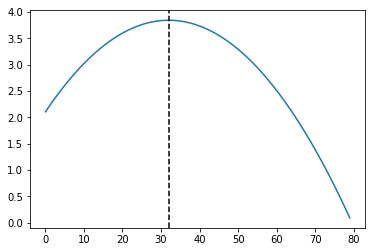

In [4]:
plt.plot(neg_quad);
plt.axvline(x=fmax, ls='--', c='black');

In [5]:
lengthscale = 1.
height = 1.

Sample reward functions from prior:

In [6]:
k = GPy.kern.RBF(input_dim=1,lengthscale=1)
X = np.arange(80)
X = X[:,None]
mu = np.zeros((80))
C = k.K(X,X)
Z = np.random.multivariate_normal(mu,C,3)

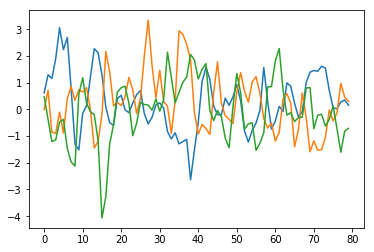

In [7]:
plt.plot(Z.T);

Pure exploit strategy:

In [8]:
steepness = 0
x_midpoint = 10
yscale = 0

In [9]:
ntrials = 20

In the below plots blue is the model of the reward function and orange is utility (they're the same for the first example, pure exploit)

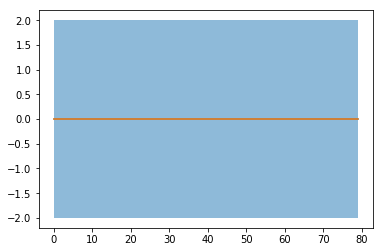

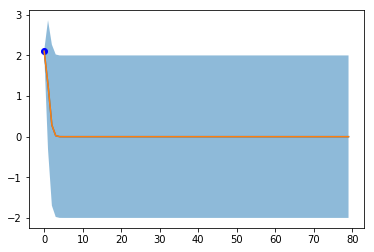

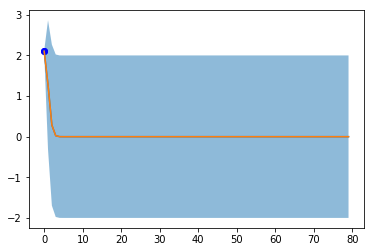

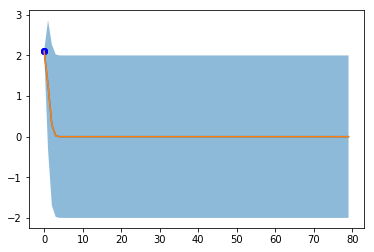

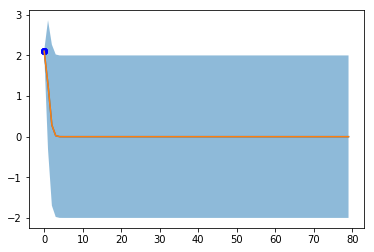

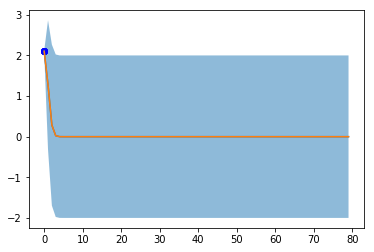

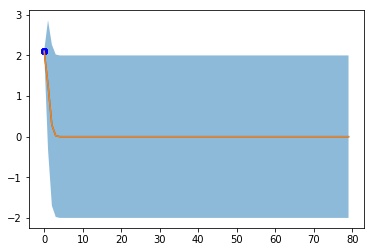

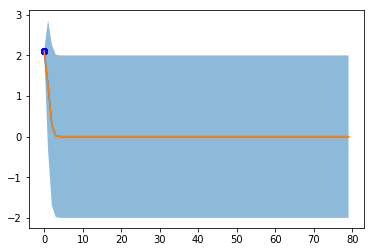

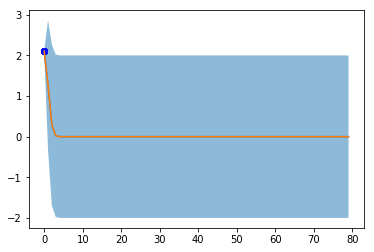

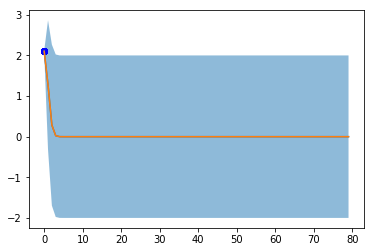

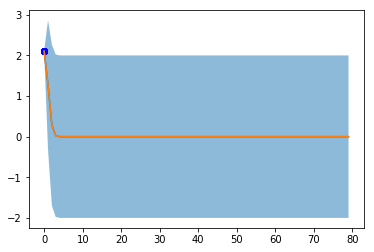

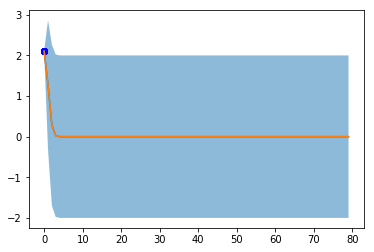

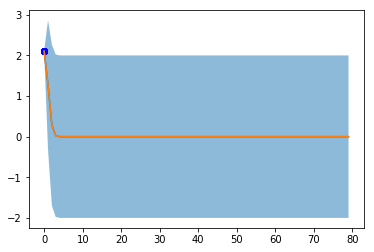

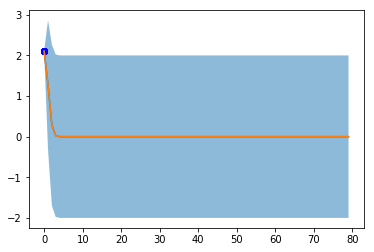

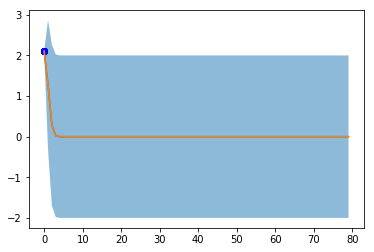

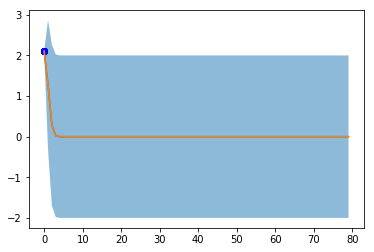

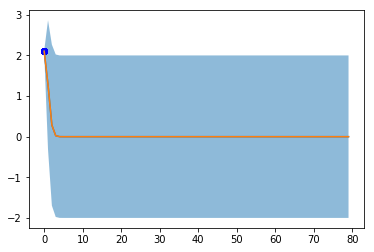

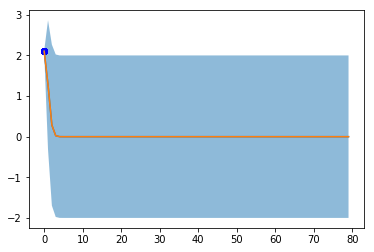

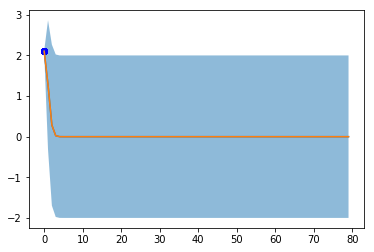

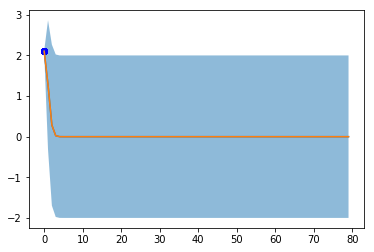

In [10]:
actions = generate1(neg_quad, ntrials, steepness, x_midpoint, yscale, lengthscale, height) 

Pure explore:

In [11]:
steepness = 100
x_midpoint = 20
yscale = 1

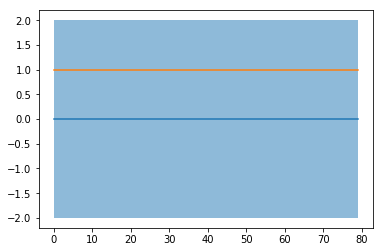

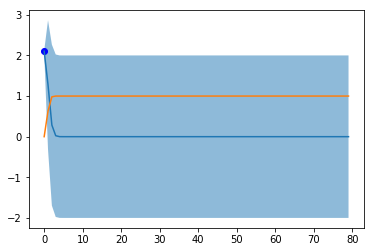

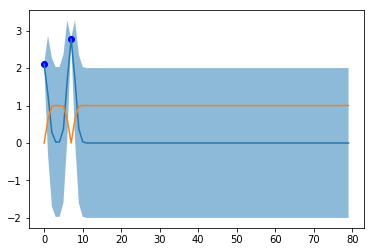

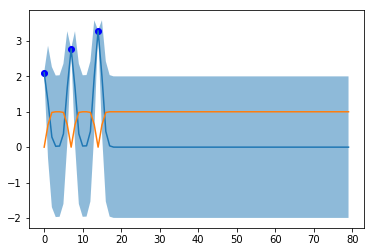

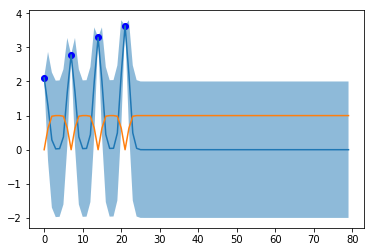

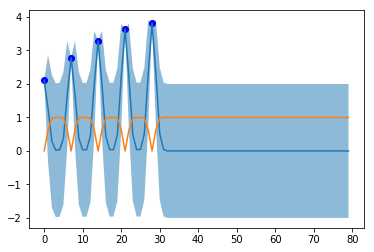

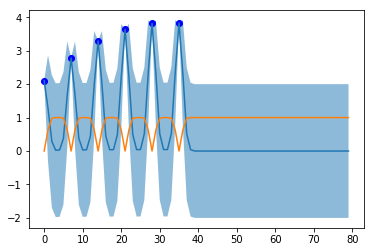

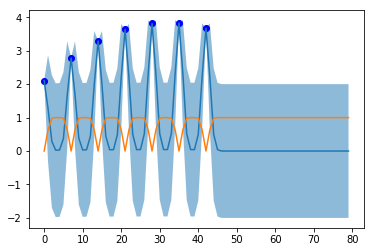

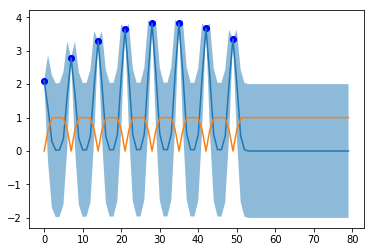

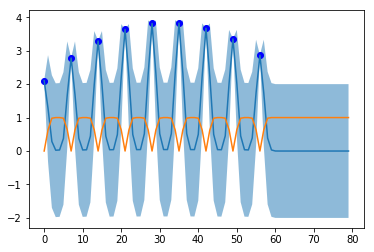

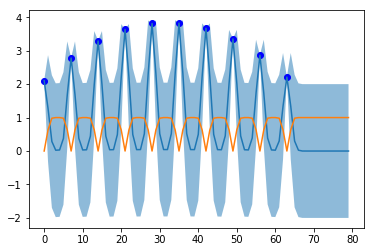

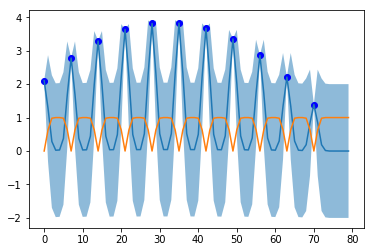

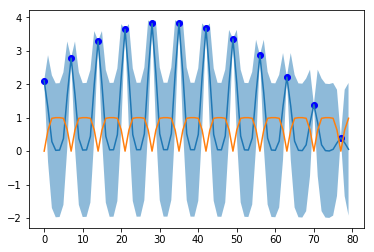

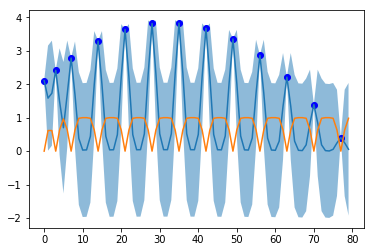

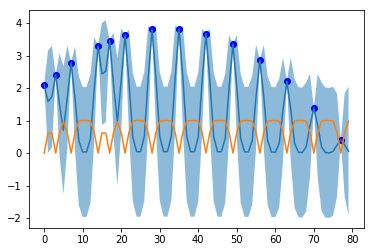

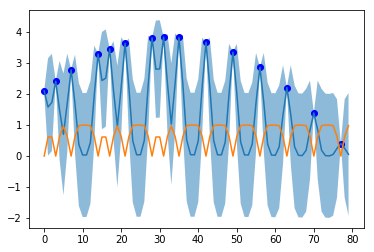

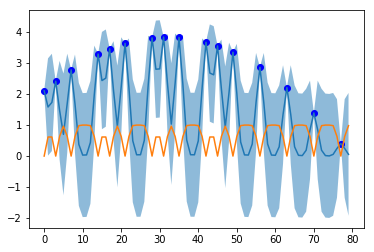

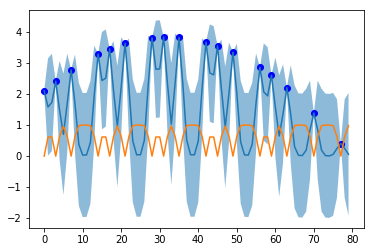

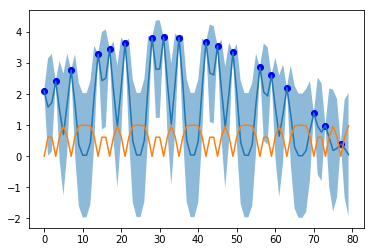

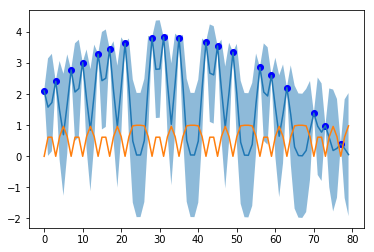

In [12]:
actions = generate1(neg_quad, ntrials, steepness, x_midpoint, yscale, lengthscale, height)

Phase:

In [13]:
steepness = 1
x_midpoint = 10
yscale = 1

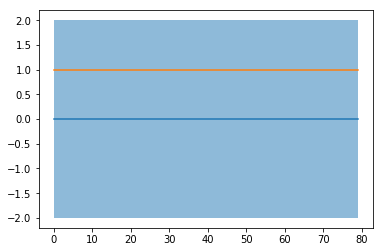

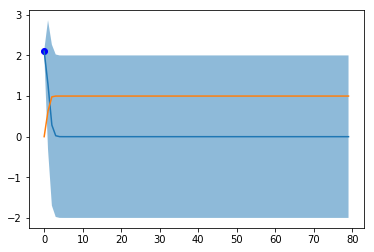

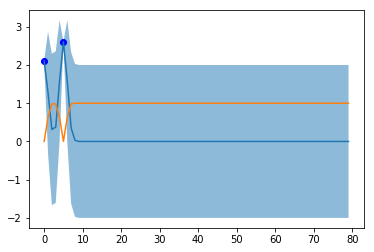

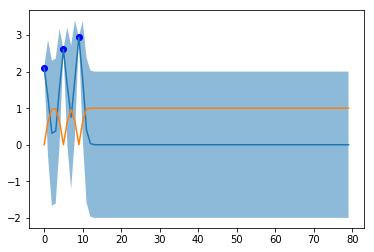

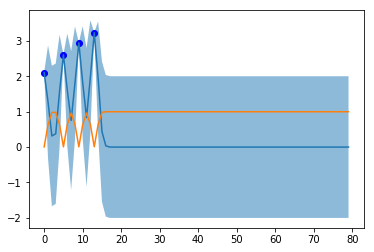

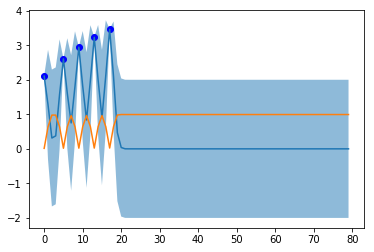

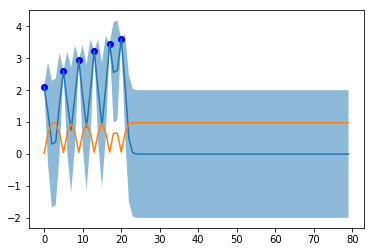

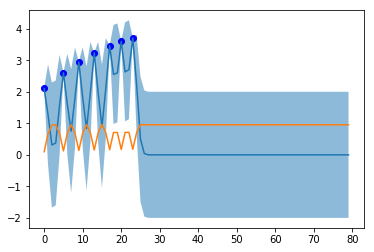

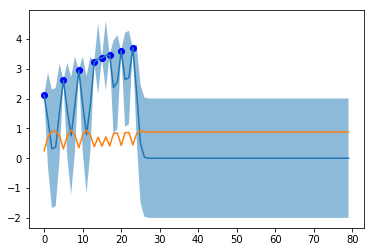

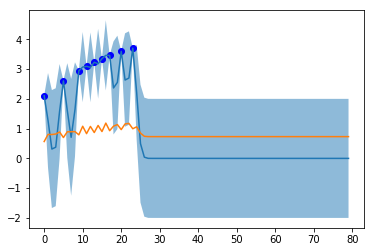

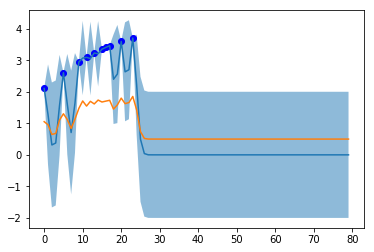

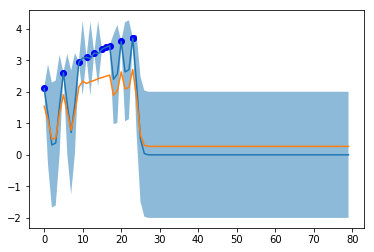

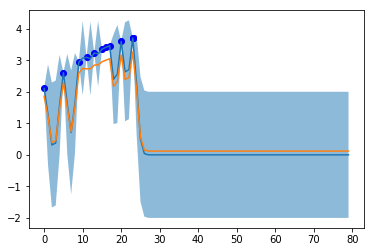

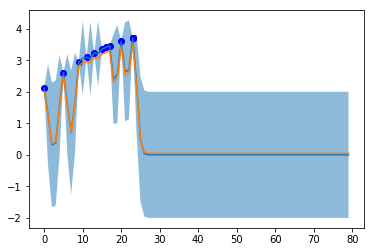

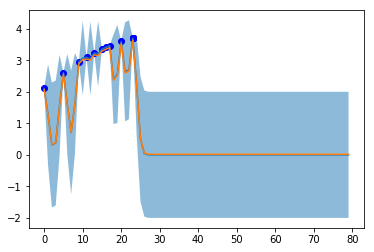

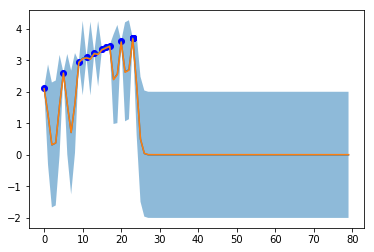

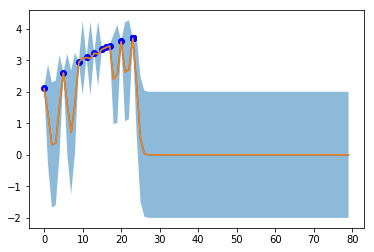

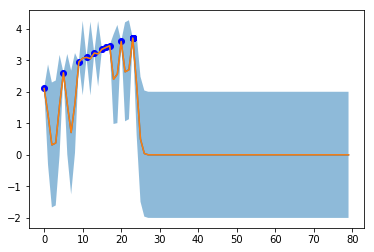

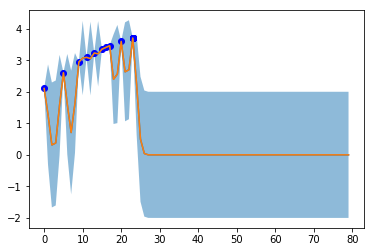

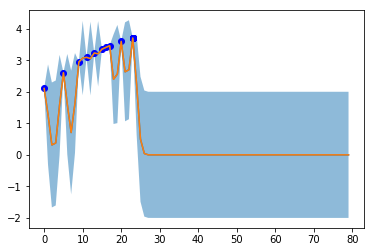

In [14]:
actions = generate1(neg_quad, ntrials, steepness, x_midpoint, yscale, lengthscale, height)

Smaller RBF height:

In [15]:
lengthscale = 1.
height = .1

In [16]:
steepness = 1
x_midpoint = 10
yscale = 1

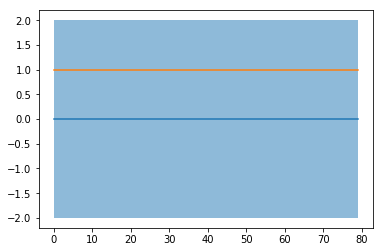

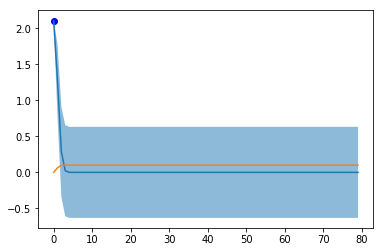

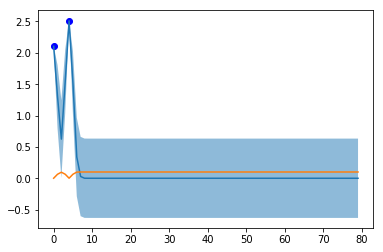

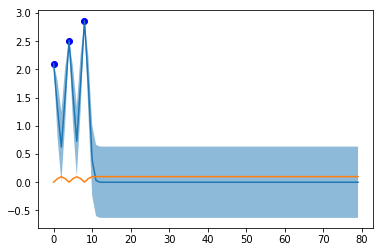

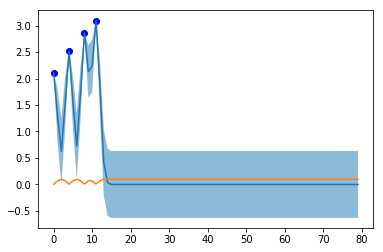

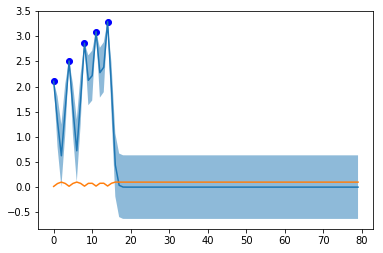

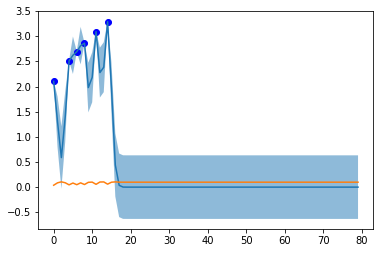

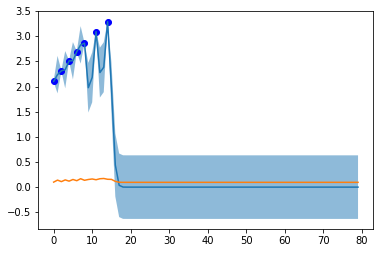

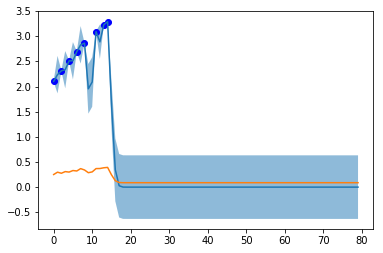

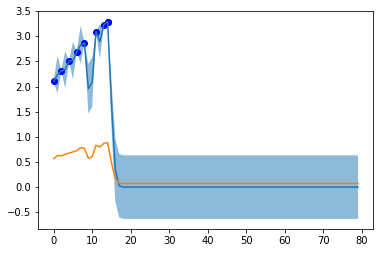

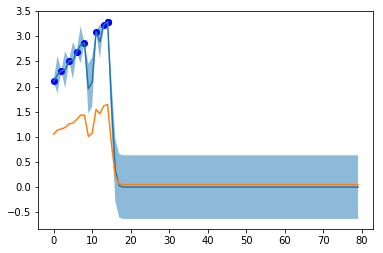

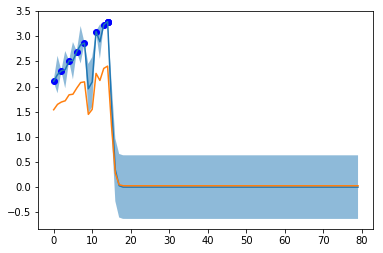

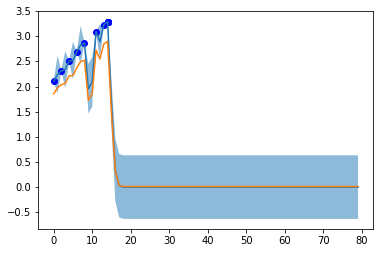

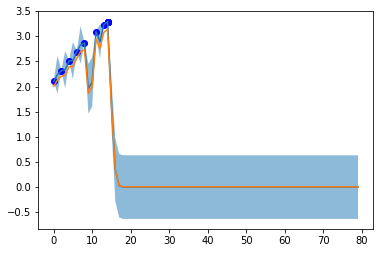

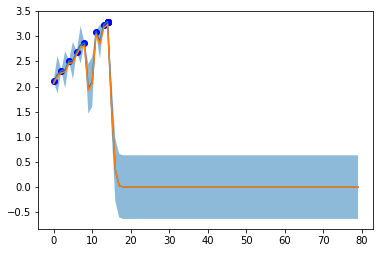

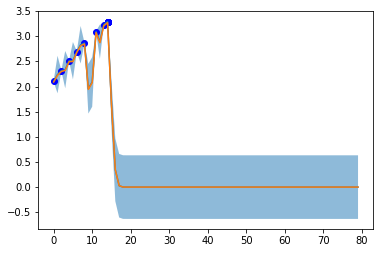

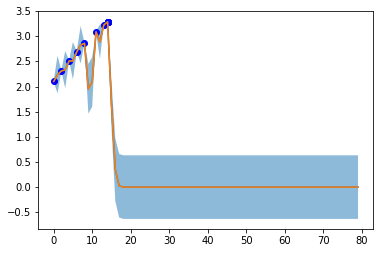

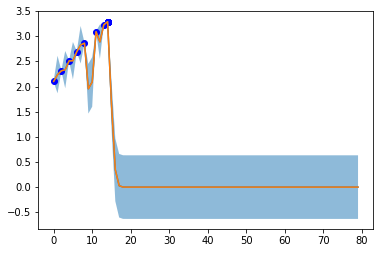

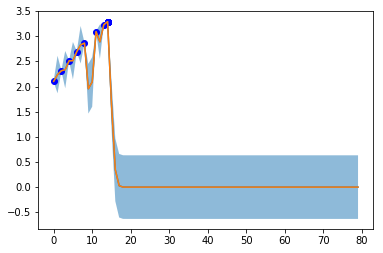

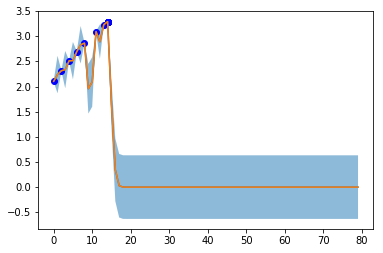

In [17]:
actions = generate1(neg_quad, ntrials, steepness, x_midpoint, yscale, lengthscale, height)